<a href="https://colab.research.google.com/github/ngcheeyuan/Learner-s-Repo-for-Tensorflow/blob/main/10_Tensorflow_Deep_learning_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TIme series froecasting fundamentals with Tensorflow:

Reference : https://github.com/mrdbourke/tensorflow-deep-learning

In [22]:
## historical price of bitcoin up to 2021-05-18
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-01-21 00:34:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2022-01-21 00:34:45 (12.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [23]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'], # pass a list of columns that you want to change to datetime format
                 index_col = ['Date'])

In [24]:
df.head(5)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [25]:
len(df),df.tail(1),df.head(1)

(2787,
            Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2021-05-18      BTC         43144.471291  ...    46622.853437    42102.34643
 
 [1 rows x 5 columns],
            Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2013-10-01      BTC            123.65499  ...       124.75166      122.56349
 
 [1 rows x 5 columns])

### Deep learning often requires alot of data, however time series problems often run into this problem where there are samller sample size

In [26]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {'Closing Price (USD)':'Price'})

In [27]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


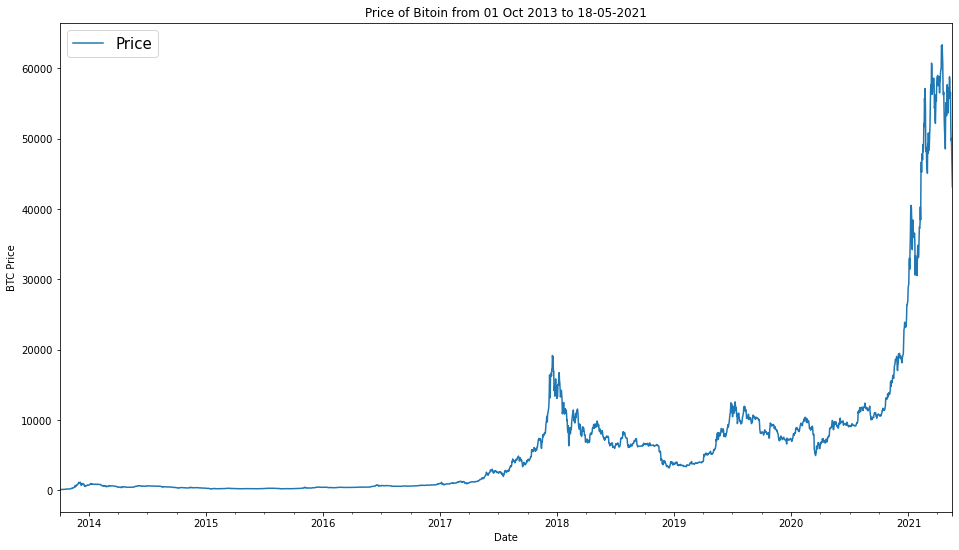

In [28]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (16,9))
plt.ylabel('BTC Price')
plt.title('Price of Bitoin from 01 Oct 2013 to 18-05-2021')
plt.legend(fontsize = 15);

## Importing time series data with Python's CSV module

In [29]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:
  csv_reader = csv.reader(f,delimiter = ',')
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get the dates as dates and not strings
    btc_price.append(float(line[2])) # get the closing price as float

In [30]:
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'BTC prices from Oct 2013 to May 2021')

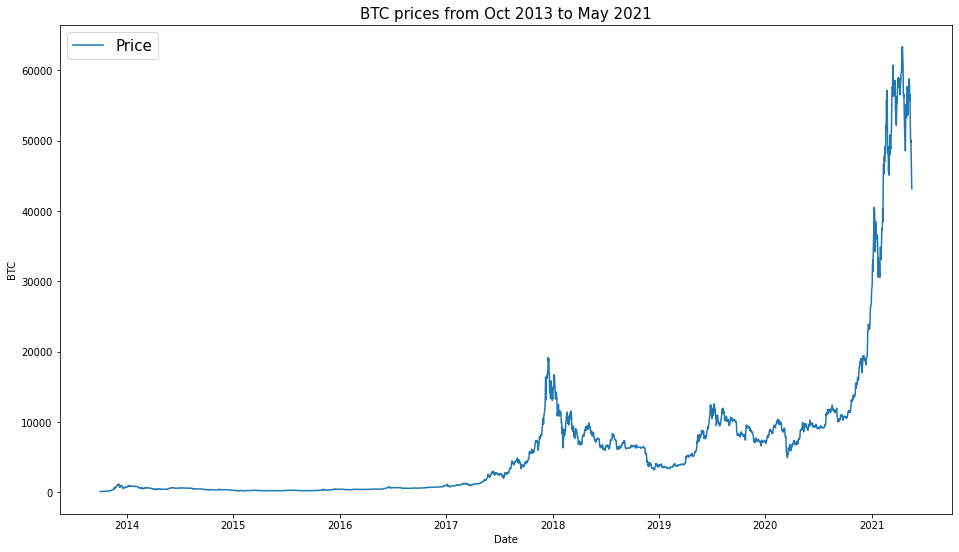

In [31]:
plt.figure(figsize = (16,9))
plt.plot(timesteps , btc_price, label = 'Price')
plt.ylabel('BTC')
plt.xlabel('Date')
plt.legend(fontsize = 15)
plt.title('BTC prices from Oct 2013 to May 2021', fontsize = 15)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()
split_size = int(0.8*len(prices))

In [34]:
X_train, y_train = timesteps[:split_size],prices[:split_size]
X_test , y_test = timesteps[split_size:], prices[split_size:]

Text(0.5, 1.0, 'BTC prices from Oct 2013 to May 2021')

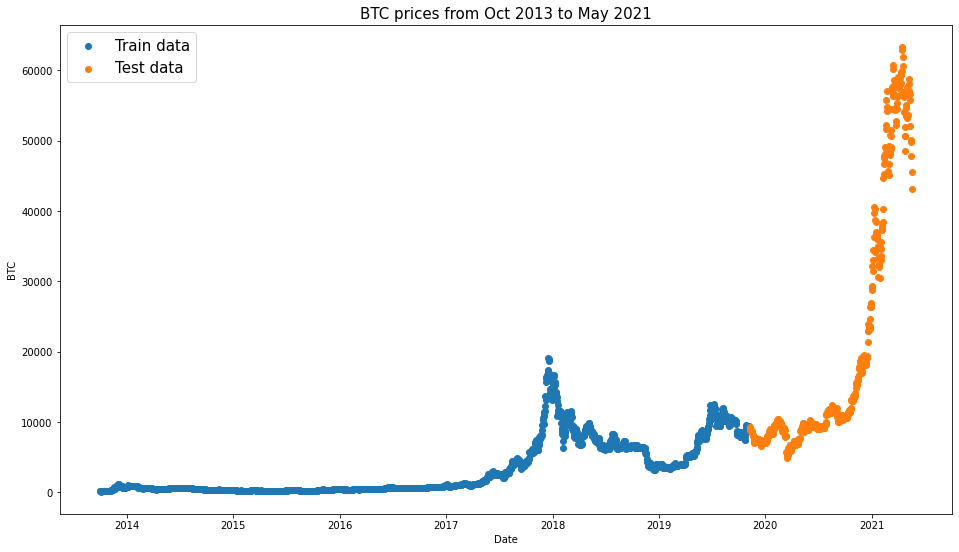

In [35]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train , label = 'Train data')
plt.scatter(X_test,y_test, label = 'Test data')
plt.ylabel('BTC')
plt.xlabel('Date')
plt.legend(fontsize = 15)
plt.title('BTC prices from Oct 2013 to May 2021', fontsize = 15)

In [36]:
## Create a plotting function

def plot_time_series(timesteps,values,format = '.', start = 0 , end = None , label = None):
  '''
  Plots timesteps against values

  Parameters:
  ----------
  timesteps: array of timestep values
  value: array of values accross time
  format : stype of plot, default : .
  start : where to start the plot
  end : where to end the plot
  label : label to show on plot about values
  '''

  plt.plot(timesteps[start:end],values[start:end], marker = format,label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

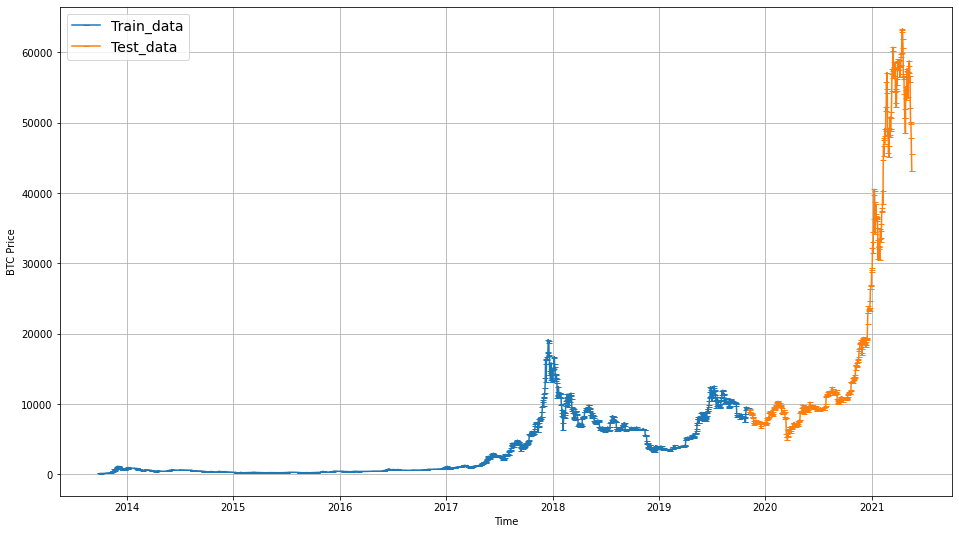

In [37]:
plt.figure(figsize = (16,9))
plot_time_series(timesteps = X_train, values = y_train , format = '_',label = 'Train_data')
plot_time_series(timesteps = X_test, values = y_test , format = '_',label = 'Test_data')

## Modelling experiments:

horizon = number of timesteps into the future you're going to predict

window size = number of timesteps we're going to use to predict horizon

0. Naive Forecast Model(baseline)
1. Dense Model , horizon = 1 , window = 7
2. Same as model 1, horizon = 1 , window = 7
3. Same as model 1, horizon = 1 , window = 30
4. Conv1D
5. LSTM
6. Same as model 1 (but with multivariate data)
7. N-BEATS algorithmn
8. Ensemble
9. Future Prediction model
10. Same as model 1 (but with turkey data introduced)

## Model 0 : Naive Forecast Model

$$\hat{y}_{t}= y_{t-1}$$

In [38]:
naive_forecast = y_test[:-1]

In [39]:
naive_forecast[:10] , naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [40]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

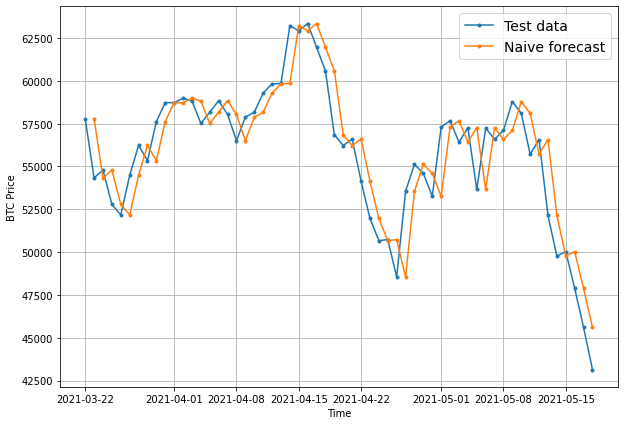

In [41]:
plt.figure(figsize = (10,7))
#plot_time_series(timesteps = X_train, values = y_train , label = 'Train data')
plot_time_series(timesteps = X_test , values = y_test, start = 500, label = 'Test data')
plot_time_series(timesteps = X_test[1:] , values = naive_forecast ,start = 500, label = 'Naive forecast')

## Time series forecasting evaluation metrics:
MAE, 

MSE,

RMSE, 

MAPE (mean absolute percentage error) - not recommended by Hyndman & Koehler, 

MASE(Mean absolute scaled error)

In [42]:
import tensorflow as tf

In [44]:
def mean_absolute_scaled_error(y_true , y_pred):
  '''
  Implement MASE assuming no seasonality
  '''

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [51]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [59]:
y_true = y_test[1:]
y_pred = y_test[:-1]
tf.reduce_sum((y_true - y_pred)/y_true)

<tf.Tensor: shape=(), dtype=float64, numpy=1.1418991598721486>

In [86]:
def time_series_metrics(y_true,y_pred):
  '''
  Returns MAE, MSE , RMSE, MAPE/SMAPE/MAE
  '''

  #Make sure float 32 datatype for metric calculations
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  #calculate various evaluation metrics
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mse = tf.reduce_mean(tf.square(y_true-y_pred))
  rmse = tf.sqrt(mse)
  mape = tf.reduce_sum((y_true - y_pred)/y_true)
  smape = tf.reduce_mean(200*(tf.abs(y_true-y_pred)/(y_true+y_pred)))
  smape_2 = tf.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  mase = mae/mae_naive_no_season

  return {'MAE':mae.numpy(),
          'MSE':mse.numpy(),
          'RMSE':rmse.numpy(),
          'MAPE':mape.numpy(),
          'sMAPE_2':smape_2.numpy(),
          'sMAPE':smape.numpy(),
          'MASE':mase.numpy()}

In [90]:
baseline_results = time_series_metrics(y_true = y_test[1:],
                                       y_pred = naive_forecast)
baseline_results

{'MAE': 567.9802,
 'MAPE': 1.1418995,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'sMAPE': 2.5180573,
 'sMAPE_2': 2.516525}

Model/Library Name 	Resource
Moving average:	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

ARIMA (Autoregression Integrated Moving Average): 	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

sktime: (Scikit-Learn for time series) 	https://github.com/alan-turing-institute/sktime

TensorFlow: Decision Forests (random forest, gradient boosting trees) 	https://www.tensorflow.org/decision_forests

Facebook Kats:(purpose-built forecasting and time series analysis library by Facebook)	https://github.com/facebookresearch/Kats

LinkedIn Greykite:(flexible, intuitive and fast forecasts) 	https://github.com/linkedin/greykite